Датасет представляет собой набор имитационных данных о клиентах магазина. <br>
Источник: https://www.kaggle.com/datasets/datascientistanna/customers-dataset
<br>

В датасете представлены следующие атрибуты:<br>
CustomerID: числовой; ID клиента<br>
Gender: строковый {Male, Female}; пол клиента<br>
Age: числовой; возраст клиента<br>
Annual Income ($): числовой; годовой доход в долларах<br>
Spending Score (1-100): числовой; балл, присваиваемый магазином, на основе
поведения покупателя и характера расходов<br>
Profession: строковый; профессия клиента<br>
Work Experience: числовой; опыт работы клиента по профессии (в годах)<br>
Family Size: числовой; количество членов семьи клиента (включая клиента)<br>

In [1]:
import pandas as pd
customers_df = pd.read_csv('Customers.csv')
print(customers_df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


Сначала, составив условия, очистим датасет от заведомо ложных данных.
Условия:<br>
Возраст клиента не может быть меньше опыта работы;<br>
Количество членов семьи не может равняться нулю.<br>

In [17]:
print(f'Rows before cleanup: {len(customers_df)}')
customers_df = customers_df[
      (customers_df['Age'] > customers_df['Work Experience'])
      & (customers_df['Family Size'] > 0)]
print(f'Rows after cleanup: {len(customers_df)}')

Rows before cleanup: 2000
Rows after cleanup: 1896


In [18]:
# Проверим датасет на наличие значений nan
print('The number of nan rows in each attribute:')
print(customers_df.isna().sum())

The number of nan rows in each attribute:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                33
Work Experience            0
Family Size                0
dtype: int64


Чтобы не потерять остальные данные, вставим на места пропусков предыдущее
валидное значение.

In [19]:
customers_df.ffill(inplace=True)
print('The number of nan rows in each attribute:')
print(customers_df.isna().sum())

The number of nan rows in each attribute:
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [20]:
customers_summary = customers_df.describe()

# Среднее значение для каждого числового атрибута
print('Mean for each numeric attribute:')
print(f'Age: {(customers_summary.loc["mean", "Age"]):.{2}f} years')
print(f'Annual Income: '
      f'{(customers_summary.loc["mean", "Annual Income ($)"]):.{2}f} $')
print(f'Spending score: '
      f'{(customers_summary.loc["mean", "Spending Score (1-100)"]):.{2}f}')
print(f'Work Experience: '
      f'{(customers_summary.loc["mean", "Work Experience"]):.{2}f} years')
print(f'Family Size: '
      f'{(customers_summary.loc["mean", "Family Size"]):.{2}f} people')

Mean for each numeric attribute:
Age: 51.45 years
Annual Income: 110220.26 $
Spending score: 50.77
Work Experience: 3.94 years
Family Size: 3.77 people


In [21]:
# Количество мужчин и женщин, процентное соотношение
male_count = customers_df['Gender'].value_counts()['Male']
female_count = customers_df['Gender'].value_counts()['Female']
print('Number of men and women, percentage')
print(f'Male count: {male_count}, ', end='')
print(f'percentage: {(male_count / len(customers_df) * 100):.{2}f} %')
print(f'Female count: {female_count}, ', end='')
print(f'percentage: {(female_count / len(customers_df) * 100):.{2}f} %')

Number of men and women, percentage
Male count: 773, percentage: 40.77 %
Female count: 1123, percentage: 59.23 %


In [22]:
# Количество человек по каждой профессии, процентное соотношение
print('Number of people in each profession, percentage')
professions_count = customers_df['Profession'].value_counts()
professions_set = set(customers_df['Profession'])
for prof in professions_set:
      print(f'{prof}: {professions_count[prof]}, percentage: '
            f'{(professions_count[prof] / len(customers_df) * 100):.{2}f} %')

Number of people in each profession, percentage
Executive: 148, percentage: 7.81 %
Marketing: 82, percentage: 4.32 %
Artist: 589, percentage: 31.07 %
Entertainment: 224, percentage: 11.81 %
Doctor: 151, percentage: 7.96 %
Healthcare: 334, percentage: 17.62 %
Engineer: 176, percentage: 9.28 %
Lawyer: 133, percentage: 7.01 %
Homemaker: 59, percentage: 3.11 %


In [23]:
# Стандартное отклонение по каждому числовому атрибуту
print('Standard deviation for each numeric attribute:')
print(f'Age: {(customers_summary.loc["std", "Age"]):.{2}f} years')
print(f'Annual Income: '
      f'{(customers_summary.loc["std", "Annual Income ($)"]):.{2}f} $')
print(f'Spending score: '
      f'{(customers_summary.loc["std", "Spending Score (1-100)"]):.{2}f}')
print(f'Work Experience: '
      f'{(customers_summary.loc["std", "Work Experience"]):.{2}f} years')
print(f'Family Size: '
      f'{(customers_summary.loc["std", "Family Size"]):.{2}f} people')

Standard deviation for each numeric attribute:
Age: 27.06 years
Annual Income: 45938.34 $
Spending score: 27.97
Work Experience: 3.86 years
Family Size: 1.97 people


Построим гистограммы распределений для каждого числового атрибута.

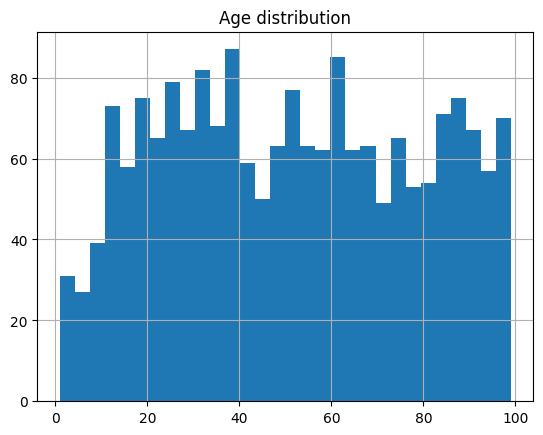

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(customers_df['Age'], bins=30)
plt.grid(True)
plt.title('Age distribution');

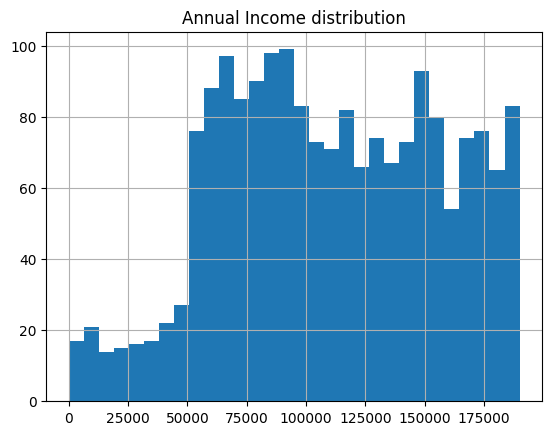

In [25]:
plt.figure()
plt.hist(customers_df['Annual Income ($)'], bins=30)
plt.grid(True)
plt.title('Annual Income distribution');

Большая часть клиентов получает имеет доход свыше 50 000$.

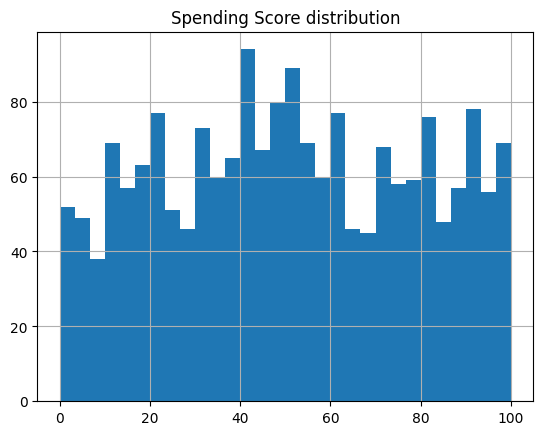

In [26]:
plt.figure()
plt.hist(customers_df['Spending Score (1-100)'], bins=30)
plt.grid(True)
plt.title('Spending Score distribution');

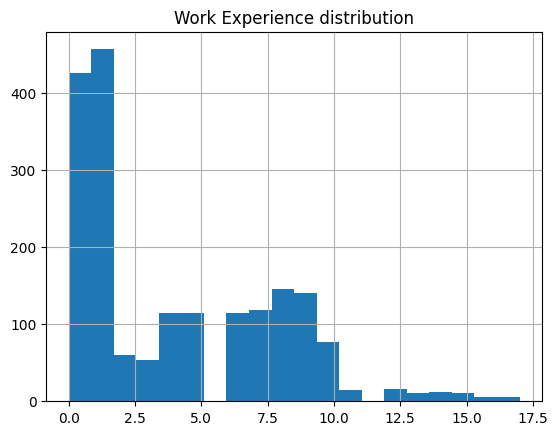

In [27]:
plt.figure()
plt.hist(customers_df['Work Experience'], bins=20)
plt.grid(True)
plt.title('Work Experience distribution');

Клиенты в основном имеют менее 10 лет опыта работы, больше всего - менее 2-х
лет.

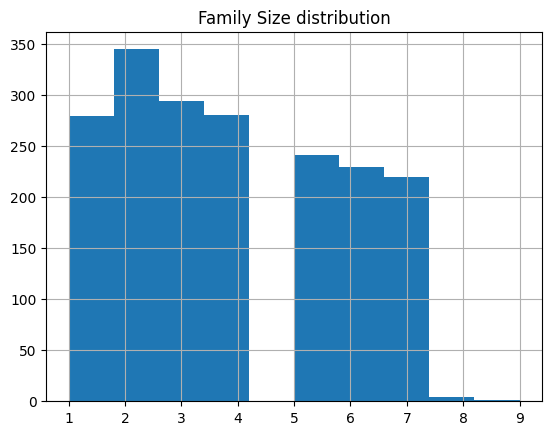

In [28]:
plt.figure()
plt.hist(customers_df['Family Size'])
plt.grid(True)
plt.title('Family Size distribution');

Большая часть семей клиентов имеет в себе не более 7 человек.

На построенных гистограммах распределений выбросов нет.

Вычислим коэффициент корреляции для каждого числового атрибута и выведем
результаты в виде тепловой карты.

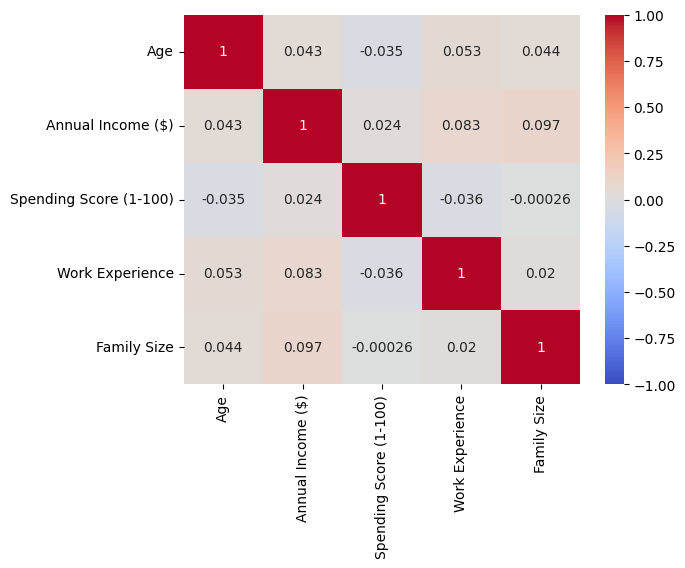

In [29]:
import seaborn as sns

corr_matrix = (customers_df[['Age',
                           'Annual Income ($)',
                           'Spending Score (1-100)',
                           'Work Experience',
                           'Family Size']]
               .corr(numeric_only=True))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1.0, vmin=-1.0);

Как видно из тепловой карты, ни один из атрибутов не имеет корреляции ни с
одним другим атрибутом. Возможно, это связано с тем, что датасет содержит
имитационные данные, и способ заполнения повлиял на конечные результаты
(возможно, данные заполнялись случайными значениями из равномерного
распределения).

Также построим матрицу графиков рассеивания.

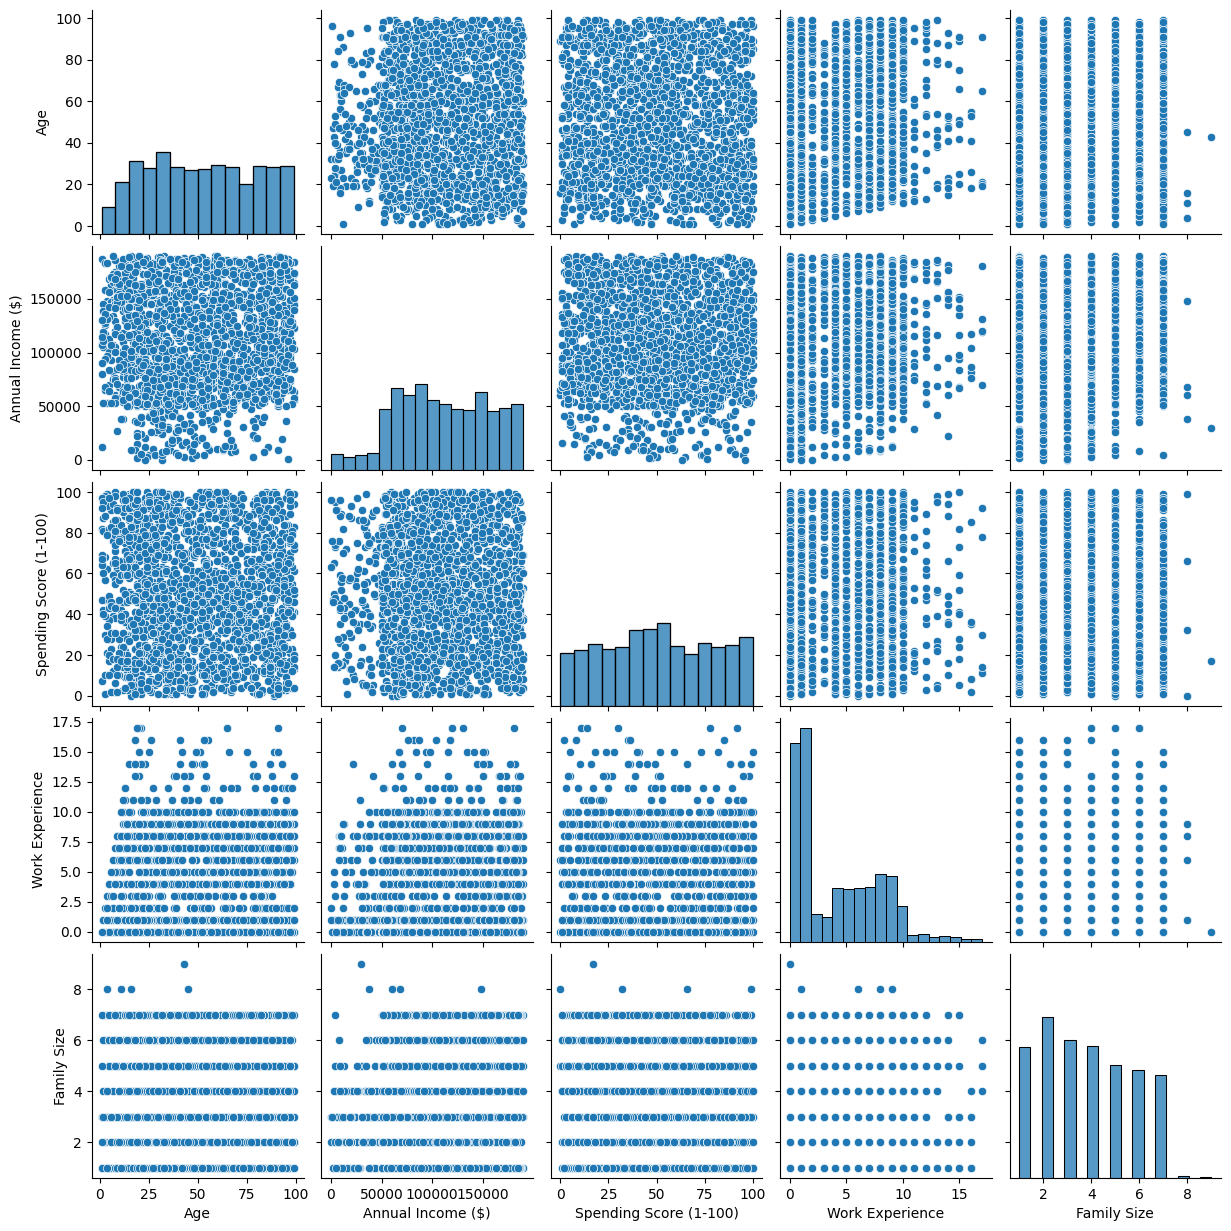

In [30]:
sns.pairplot(customers_df[['Age',
                           'Annual Income ($)',
                           'Spending Score (1-100)',
                           'Work Experience',
                           'Family Size']]);

Графики подтверждают тот факт, что какая-либо корреляция между
атрибутами отсутствует. Тем не менее, можно отметить несколько наблюдений:<br>
1. Клиенты возрастом менее 25 и более 75 гораздо реже имеют доход менее 50 000$;
2. Клиенты возрастом менее 25 не имеют большого опыта работы.